# Deep Reinforcement Learning

O objetivo de Deep Reinforcement Learning é encontrar uma Função de Aproximação que permita resolver ambientes complexos, lidando com o problema da generalização.

Tudo começou em 2013, com o Deep Mind (que mais tarde seria comprado pelo Google para se tornar o braço de pesquisa em Deep Learning): 

https://arxiv.org/abs/1312.5602

https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf

In [17]:
# versões dos pacotes
!cat requirements.txt

python=3.6.5
numpy=1.14.3
tensorflow=1.10.0
keras=2.2.4
matplotlib
jupyter
seaborn
Pillow

## Criar um ambiente virtual para executar o jupyter
1. conda create -n tf36 --file requirements.txt
2. conda activate tf36
3. (tf36) $ jupyter notebook

In [1]:
!python -V

Python 3.6.5


## Reinforcement Learning

Considere o jogo Breakout. Neste jogo você controla uma pá na parte inferior da tela e tem que saltar a bola de volta para limpar todos os tijolos na metade superior da tela. Cada vez que você bate em um tijolo, ele desaparece e sua pontuação aumenta - você recebe uma recompensa.

Suponha que você queira ensinar uma rede neural a jogar este jogo. A entrada em sua rede seria imagens de tela, e a saída seria de três ações: esquerda, direita ou fogo (para iniciar a bola). Teria sentido tratá-lo como um problema de classificação - para cada tela de jogo você deve decidir, se você deve mover para a esquerda, direita ou pressionar o fogo. Parece simples? Claro, mas então você precisa de exemplos de treinamento, e muitos deles. Claro que você poderia gravar sessões de jogos usando jogadores experientes, mas isso não é realmente como aprendemos. Não precisamos de alguém para nos contar um milhão de vezes que se movem para escolher em cada tela. Nós apenas precisamos de feedback ocasional que fizemos a coisa certa e podemos descobrir todos os outros nós mesmos.

Esta é a tarefa que o aprendizado de reforço tenta resolver. O aprendizado de reforço situa-se entre a aprendizagem supervisionada e não supervisionada. No aprendizado supervisionado, usamos um rótulo alvo para cada exemplo de treinamento e na aprendizagem sem supervisão não tem rótulos. No aprendizado por reforço, temos rótulos dispersos e atrasados, as recompensas. Com base apenas nas recompensas, o agente deve aprender a comportar-se no ambiente.

<img src="images/breakout.png">

Embora a ideia seja bastante intuitiva, na prática há inúmeros desafios. Por exemplo, quando você bate em um tijolo e ganha uma recompensa no jogo Breakout, muitas vezes não tem nada a ver com as ações (movimentos de remo) que você fez antes de obter a recompensa. Todo o trabalho duro já foi feito, quando você colocou a pá corretamente e saltou a bola de volta. Isso é chamado de problema de atribuição de crédito - ou seja, qual das ações anteriores foi responsável por receber a recompensa e até que ponto.

Depois de ter descoberto uma estratégia para coletar um certo número de recompensas, você deve ficar com ela ou experimentar alguma coisa que possa resultar em recompensas ainda maiores? No jogo Breakout acima, uma estratégia simples é mover-se para a margem esquerda e esperar lá. Quando lançado, a bola tende a voar para a esquerda com mais frequência do que a direita e você conseguirá marcar com facilidade cerca de 10 pontos antes de morrer. Você ficará satisfeito com isso ou quer mais? Isso é chamado de dilema explore-exploit - você deve explorar a estratégia de trabalho conhecida ou explorar outras estratégias possivelmente melhores?

O aprendizado por reforço é um modelo importante de como nós (e todos os animais em geral) aprendemos. Elogios de nossos pais, notas na escola, salário no trabalho - estes são exemplos de recompensas. Problemas de atribuição de crédito e dilemas explore-exploit surgem todos os dias, tanto nos negócios como nos relacionamentos. É por isso que é importante estudar este problema, e os jogos formam uma sandbox maravilhosa para experimentar novas abordagens.

## Markov Decision Process

Agora, a questão é como você formaliza um problema de aprendizado por reforço, para que você possa raciocinar sobre ele? O método mais comum é representá-lo como um Processo de Decisão Markov.

Suponha que você seja um agente, situado em um ambiente (por exemplo, o jogo Breakout). O ambiente está em certo estado (por exemplo, localização da pá, localização e direção da bola, existência de cada tijolo e assim por diante). O agente pode executar certas ações no ambiente (por exemplo, mover a pá para a esquerda ou para a direita). Essas ações às vezes resultam em uma recompensa (por exemplo, aumento na pontuação). As ações transformam o ambiente e conduzem a um novo estado, onde o agente pode executar outra ação, e assim por diante. As regras sobre como você escolhe essas ações são chamadas de política. O ambiente em geral é estocástico, o que significa que o próximo estado pode ser um pouco aleatório (por exemplo, quando você perde uma bola e lança uma nova, vai para uma direção aleatória).

<img src="images/mdp.png">

O conjunto de estados e ações, juntamente com as regras para a transição de um estado para outro, compõem um processo de decisão Markov. Um episódio deste processo (por exemplo, um jogo) forma uma sequência finita de estados, ações e recompensas:

<img src="images/mdp2.png">

Aqui si representa o estado, ai é a ação e ri + 1 é a recompensa depois de executar a ação. O episódio termina com o estado do terminal sn (por exemplo, "game over"). Um processo de decisão de Markov baseia-se na suposição de Markov, que a probabilidade de o próximo estado si + 1 depende apenas do estado atual si e da ação ai, mas não de estados ou ações anteriores.

## Discounted Future Reward

Para se comportar bem a longo prazo, precisamos levar em conta não só as recompensas imediatas, mas também as recompensas futuras que vamos conseguir. Como devemos fazer isso?

Dada uma série do processo de decisão de Markov, podemos calcular facilmente a recompensa total de um episódio:

<img src="images/reward1.png">

Dado que, a recompensa futura total a partir do ponto de tempo a seguir pode ser expressa como:

<img src="images/reward2.png">

Mas porque o nosso ambiente é estocástico, nunca podemos ter certeza, se conseguirmos as mesmas recompensas na próxima vez que realizarmos as mesmas ações. Quanto mais no futuro nós vamos, mais pode divergir. Por esse motivo, é comum usar uma recompensa futura com desconto em vez disso:

<img src="images/reward3.png">

Aqui γ é o fator de desconto entre 0 e 1 - quanto mais no futuro a recompensa é, menos levamos em consideração. É fácil de ver, que a recompensa futura com desconto no tempo passo t pode ser expressa em termos da mesma coisa no tempo passo t + 1:

<img src="images/reward4.png">

Se definimos o fator de desconto γ = 0, nossa estratégia será míope e confiamos apenas nas recompensas imediatas. Se quisermos equilibrar entre recompensas imediatas e futuras, devemos definir fator de desconto para algo como γ = 0.9. Se o nosso ambiente for determinista e as mesmas ações sempre resultarão nas mesmas recompensas, então podemos definir o fator de desconto γ = 1.

Uma boa estratégia para um agente seria sempre escolher uma ação que maximize a recompensa futura (descontada).

## Play Game com Agente Baseado em IA

<img src="images/catch-game.jpg">

Catch é um jogo de arcade muito simples, que você provavelmente já jogou. Os frutos estão caindo do topo da tela e o jogador precisa pegá-los com um cesto. Para cada fruta capturada, o jogador recebe um ponto. Para cada fruta perdida, o jogador perde um ponto. Nosso objetivo aqui é permitir que o computador jogue este game por si só.

Ao jogar Catch, o jogador deve decidir entre 3 possíveis ações. O jogador pode mover a cesta para a esquerda, para a direita ou ficar na posição. A base para esta decisão é o estado atual do jogo, a posição do fruto e a posição do cesto, ambos visíveis na tela. Nosso objetivo é, portanto, criar um modelo que, dado o conteúdo da tela do jogo, escolha a ação que leva à maior pontuação possível.

Esta tarefa poderia ser enquadrada como um problema de classificação simples. Poderíamos coletar dados de treinamento, permitindo que jogadores humanos experientes jogassem muitos jogos e, em seguida, treinassem um modelo para escolher a ação "correta" que espelha os jogadores experientes. Não é assim que os humanos aprendem no entanto. Os seres humanos podem aprender um jogo sem orientação. Isso é muito útil. Imagine que você teria que contratar um monte de especialistas para realizar uma tarefa milhares de vezes toda vez que você queria aprender algo tão simples como Catch. Seria muito caro e muito lento. Aqui, usaremos Deep Reinforcement Learning, onde o modelo aprende da experiência, em vez de dados de treinamento rotulados.

In [2]:
# Imports
import numpy as np
import json
import matplotlib.pyplot as plt
import time
from PIL import Image
from IPython import display
import seaborn
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import sgd

%matplotlib inline
seaborn.set()

Using TensorFlow backend.


# Preparando o Game

No jogo, frutas, representadas por azulejos brancos, caem do topo. O objetivo é pegar os frutos com um basket (representado por azulejos brancos). Se você pegar uma fruta, você obtém um ponto (sua pontuação sobe por um), se você perder uma fruta, perdeu um (sua pontuação diminui).

Não se preocupe muito com os detalhes da implementação, o foco aqui deve ser na IA, e não no jogo. Apenas certifique-se de executar esta célula para que ela seja definida.

In [3]:
class Catch(object):
    def __init__(self, grid_size=10):
        self.grid_size = grid_size
        self.reset()

    def _update_state(self, action):
        """
        Input: ações e estados
        Ouput: novos estados e recompensas
        """
        state = self.state
        if action == 0:  # left
            action = -1
        elif action == 1:  # stay
            action = 0
        else:
            action = 1  # right
        f0, f1, basket = state[0]
        new_basket = min(max(1, basket + action), self.grid_size-1)
        f0 += 1
        out = np.asarray([f0, f1, new_basket])
        out = out[np.newaxis]

        assert len(out.shape) == 2
        self.state = out

    def _draw_state(self):
        im_size = (self.grid_size,)*2
        state = self.state[0]
        canvas = np.zeros(im_size)
        canvas[state[0], np.asscalar(state[1])] = 1 #   # desenha fruta        
        canvas[-1, state[2]-1: np.asscalar(state[2]) + 2] = 1   # desenha basket
        
        return canvas

        
    def _get_reward(self):
        fruit_row, fruit_col, basket = self.state[0]
        if fruit_row == self.grid_size-1:
            if abs(fruit_col - basket) <= 1:
                return 1
            else:
                return -1
        else:
            return 0

    def _is_over(self):
        if self.state[0, 0] == self.grid_size-1:
            return True
        else:
            return False

    def observe(self):
        canvas = self._draw_state()
        return canvas.reshape((1, -1))

    def act(self, action):
        self._update_state(action)
        reward = self._get_reward()
        game_over = self._is_over()
        return self.observe(), reward, game_over

    def reset(self):
        n = np.random.randint(0, self.grid_size-1, size=1)
        m = np.random.randint(1, self.grid_size-2, size=1)
        self.state = np.asarray([0, n, m])[np.newaxis]

Além de definir o jogo, precisamos definir algumas variáveis e funções auxiliares. Execute as células abaixo para defini-las.

In [4]:
# O último time frame faz o controle do quadro em que estamos
last_frame_time = 0

# Traduz as ações para palavras humanas legíveis
translate_action = ["Left","Stay","Right","Create Ball","End Test"]

# Tamanho do campo de jogo
grid_size = 10

In [5]:
def display_screen(action,points,input_t):
    # Renderiza a tela do jogo
    global last_frame_time
    print("Action %s, Points: %d" % (translate_action[action],points))
    
    # Somente mostra a tela do jogo se não for game over
    if("End" not in translate_action[action]):
        plt.imshow(input_t.reshape((grid_size,)*2), interpolation='none', cmap='gray')
        display.clear_output(wait=True)
        display.display(plt.gcf())
    last_frame_time = set_max_fps(last_frame_time)
    
    
def set_max_fps(last_frame_time,FPS = 1):
    current_milli_time = lambda: int(round(time.time() * 1000))
    sleep_time = 1./FPS - (current_milli_time() - last_frame_time)
    if sleep_time > 0:
        time.sleep(sleep_time)
    return current_milli_time()

## Deep Reinforcement Learning

Agora vamos a parte emocionante.

## Q-Learning 

No Q-learning, definimos uma função Q(s, a) que representa a recompensa futura máxima com desconto quando executamos a ação a no estado s e continuamos de forma óptima a partir desse ponto.

Uma boa maneira de entender Q-learning é comparar jogar Catch com jogar xadrez. Em ambos os jogos, você recebe um estado s (xadrez: posições das figuras no tabuleiro, Catch: localização do fruto e do cesto), no qual você deve tomar uma ação a (xadrez: mova uma figura, Catch: move o cesto à esquerda, à direita ou fica onde você está). Como resultado, haverá alguma recompensa e um novo estado s '. O problema tanto com Catch quanto com o xadrez é que as recompensas não aparecerão imediatamente após você ter tomado a ação. Em Catch, você só ganha recompensas quando os frutos caem na cesta ou caem no chão, e no xadrez você só ganha uma recompensa quando ganha ou perde o jogo. As recompensas são _sparsely distributed_, na maioria das vezes, r será 0. Quando há uma recompensa, nem sempre é resultado da ação tomada imediatamente antes. Algumas ações tomadas muito antes podem ter causado a vitória. Determinar qual ação é responsável pela recompensa é muitas vezes referido como _credit assignment problem_.

Como as recompensas são atrasadas, os bons jogadores de xadrez não escolhem suas peças apenas pela recompensa imediata, mas pela recompensa futura esperada. Eles não só pensam sobre se eles podem eliminar uma figura de oponentes no próximo movimento, mas como tomar uma determinada ação agora irá ajudá-los a longo prazo.

No Q-learning, escolhemos nossa ação com base na maior recompensa futura esperada. Enquanto no estado s, estimamos a recompensa futura para cada ação possível a. Assumimos que depois de terem feito uma ação e mudado para o próximo estado s', tudo funciona perfeitamente. Como em finanças, nós descontamos recompensas futuras, já que elas são incertas.

A recompensa futura esperada Q(s, a) dado um estado s e uma ação a é, portanto, a recompensa r que segue diretamente de um mais a recompensa futura esperada Q(s', a') se a ação ideal a' for tomada em o seguinte estado s', descontado pelo fator de desconto gama.

Q(s,a) = r + gamma * max Q(s’,a’)

Os bons jogadores de xadrez são muito bons na estimativa de recompensas futuras em sua cabeça. Em outras palavras, sua função Q (s, a) é muito precisa. A maioria das práticas de xadrez gira em torno do desenvolvimento de uma melhor função Q. Os jogadores examinam muitos jogos antigos para saber como os movimentos específicos se desenrolaram no passado e a probabilidade de uma determinada ação levar a vitória.

Mas como podemos estimar uma boa função Q? É aqui que as redes neurais entram em jogo.


## Como Treinar o Agente

Ao jogar, geramos muitas experiências consistindo no estado inicial s, na ação tomada a, na recompensa ganha r e no estado que seguiu s'. Essas experiências são nossos dados de treinamento. Podemos enquadrar o problema de estimar Q(s, a) como um simples problema de regressão. Dado um vetor de entrada consistindo de s e uma rede neural é suposto prever o valor de Q(s, a) igual ao alvo: r + gama * max Q(s', a'). Se for bom prever Q(s, a) para diferentes estados s e ações a, temos uma boa aproximação de Q. Observe que Q(s', a') é também uma predição da rede neural que estamos treinando.

Dado um lote de experiências < s, a, r, s’ >, o processo de treinamento então é o seguinte:

1. Para cada ação possível a' (esquerda, direita, permanência), preveja a recompensa futura esperada Q(s', a') usando a rede neural
2. Escolha o valor mais alto das três predições max Q(s', a')
3. Calcule r + gama * max Q (s', a'). Este é o valor alvo da rede neural.
4. Treina a rede neural usando a função de perda 1/2(predicted_Q(s,a) - target)^2

Durante a jogabilidade, todas as experiências são armazenadas em uma memória de repetição. Esta é a classe abaixo.

A função de lembrança simplesmente salva uma experiência em uma lista. A função get_batch executa os passos 1 a 3 da lista acima e retorna uma entrada e um vetor de destino. O treinamento real é feito em uma função discutida abaixo.

In [6]:
class ExperienceReplay(object):
    def __init__(self, max_memory=100, discount=.9):
        """
        Setup
        max_memory: o número máximo de experiências que queremos armazenar
        memory: uma lista de experiências
        discount: o fator de desconto para a experiência futura
        
        Na memória, a informação se o jogo terminou no estado é armazenada separadamente em uma matriz aninhada
        [...
        [experience, game_over]
        [experience, game_over]
        ...]
        """
        self.max_memory = max_memory
        self.memory = list()
        self.discount = discount

    def remember(self, states, game_over):
        # Salvando o estado na memória
        self.memory.append([states, game_over])
        
        # Nós não queremos armazenar memórias infinitas, então, se tivermos demais, 
        # simplesmente excluímos o mais antigo
        if len(self.memory) > self.max_memory:
            del self.memory[0]

    def get_batch(self, model, batch_size=10):
        
        # Quantas experiências temos?
        len_memory = len(self.memory)
        
        # Calcule o número de ações que podem ser tomadas no jogo
        num_actions = model.output_shape[-1]
        
        # Dimensões do campo de jogo
        env_dim = self.memory[0][0][0].shape[1]
        
        # Queremos retornar um vetor de entrada e destino com entradas de um estado observado...
        inputs = np.zeros((min(len_memory, batch_size), env_dim))
        
        # ...e target r + gamma * max Q(s’,a’)
        # Observe que nosso alvo é uma matriz, com possíveis campos não só para a ação realizada, mas também 
        # para as outras ações possíveis. As ações não tomam o mesmo valor que a previsão de não afetá-las.
        targets = np.zeros((inputs.shape[0], num_actions))
        
        # Nós desenhamos estados para aprender aleatoriamente
        for i, idx in enumerate(np.random.randint(0, len_memory, size=inputs.shape[0])):

            state_t, action_t, reward_t, state_tp1 = self.memory[idx][0]
            
            # Também precisamos saber se o jogo terminou nesse estado
            game_over = self.memory[idx][1]

            # Adicione o estado s à entrada
            inputs[i:i+1] = state_t
            
            # Primeiro, preenchemos os valores-alvo com as previsões do modelo. 
            # Eles não serão afetados pelo treinamento (uma vez que a perda de treinamento para eles é 0)
            targets[i] = model.predict(state_t)[0]
            
            """
            Se o jogo acabou, a recompensa esperada Q (s, a) deve ser a recompensa final r.
            Ou então o target value é r + gamma * max Q(s’,a’)
            """
            Q_sa = np.max(model.predict(state_tp1)[0])
            
            # Se o jogo acabou, a recompensa é a recompensa final.
            if game_over:  
                targets[i, action_t] = reward_t
            else:
                # r + gamma * max Q(s’,a’)
                targets[i, action_t] = reward_t + self.discount * Q_sa
        return inputs, targets


## Definindo o Modelo

Agora é hora de definir o modelo que irá aprender Q. Estamos usando o Keras como frontend para Tensorflow ou Theano. Nosso modelo de linha de base é uma rede muito simples de 3 camadas densas. Você pode brincar com modelos mais complexos e ver se você pode melhorar o desempenho.

In [7]:
def baseline_model(grid_size,num_actions,hidden_size):
    model = Sequential()
    model.add(Dense(hidden_size, input_shape=(grid_size**2,), activation='relu'))
    model.add(Dense(hidden_size, activation='relu'))
    model.add(Dense(num_actions))
    model.compile(sgd(lr = .1), "mse")
    return model

## Parâmetros

Antes de começar a treinar, precisamos definir alguns parâmetros. Você também pode experimentar com esses.

In [8]:
# Parâmetros
epsilon = .1      # Exploração
num_actions = 3   # [move_left, stay, move_right]
max_memory = 500  # Número máximo de experiências que estamos armazenando
hidden_size = 100 # Tamanho das camadas ocultas
batch_size = 1    # Número de experiências que usamos para treinar por lote
grid_size = 10    # Tamanho do campo de jogo

In [9]:
# Modelo
model = baseline_model(grid_size,num_actions,hidden_size)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 20,503
Trainable params: 20,503
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Define environment/game
env = Catch(grid_size)

# Inicializa o objeto de repetição da experiência
exp_replay = ExperienceReplay(max_memory=max_memory)

## Treinando o Modelo

O treinamento é relativamente direto. Nós deixamos o modelo jogar o jogo. Enquanto joga, ele gera dados de treinamento na forma de experiências. Usamos esses dados de treinamento para treinar nosso estimador Q.

In [11]:
def train(model, epochs, verbose = 1):
    win_cnt = 0
    win_hist = []
    
    for e in range(epochs):
        loss = 0.
        env.reset()
        game_over = False
        input_t = env.observe()
        
        while not game_over:
            
            # O aluno está atuando na última tela de jogo observada
            # input_t é um vetor que contém a representação da tela do jogo
            input_tm1 = input_t
            
            if np.random.rand() <= epsilon:
                action = np.random.randint(0, num_actions, size=1)
            else:
                q = model.predict(input_tm1)
                # Escolhemos a ação com a maior recompensa esperada
                action = np.argmax(q[0])

            # Aplicar ação, obter recompensas e novo estado
            input_t, reward, game_over = env.act(action)

            if reward == 1:
                win_cnt += 1        
            
            # Experiência 
            exp_replay.remember([input_tm1, action, reward, input_t], game_over)    
            
            # Carregar lote de experiências
            inputs, targets = exp_replay.get_batch(model, batch_size=batch_size)
  
            # Modelo de traino sobre experiências
            batch_loss = model.train_on_batch(inputs, targets)
            
            loss += batch_loss
        if verbose > 0:
            print("Epoch {:03d}/{:03d} | Loss {:.4f} | Win count {}".format(e, epochs, loss, win_cnt))
        win_hist.append(win_cnt)
    return win_hist

## Playing Vários Games

Para se tornar um bom jogador, nosso modelo precisa jogar _many_ games. Descobri que, após cerca de 4.000 jogos, tornou-se um jogador decente. Por causa de um notebook legível, desabilitamos a saída do treinador aqui. Veja a seção sobre avaliação do progresso abaixo para um gráfico.

In [12]:
# Número de jogos jogados no treinamento. O modelo precisa de cerca de 4.000 jogos até que ele jogue bem
epoch = 5000 

# Treinando o Modelo
hist = train(model, epoch, verbose=1)
print("Treinamento Concluído!")

Epoch 000/5000 | Loss 0.4116 | Win count 0
Epoch 001/5000 | Loss 0.1888 | Win count 0
Epoch 002/5000 | Loss 0.0290 | Win count 1
Epoch 003/5000 | Loss 0.0874 | Win count 1
Epoch 004/5000 | Loss 1.0769 | Win count 1
Epoch 005/5000 | Loss 0.4128 | Win count 1
Epoch 006/5000 | Loss 0.2823 | Win count 1
Epoch 007/5000 | Loss 0.2664 | Win count 1
Epoch 008/5000 | Loss 0.1499 | Win count 1
Epoch 009/5000 | Loss 0.0148 | Win count 1
Epoch 010/5000 | Loss 0.0402 | Win count 1
Epoch 011/5000 | Loss 0.0188 | Win count 2
Epoch 012/5000 | Loss 0.0374 | Win count 2
Epoch 013/5000 | Loss 0.7785 | Win count 2
Epoch 014/5000 | Loss 0.0850 | Win count 3
Epoch 015/5000 | Loss 0.0323 | Win count 4
Epoch 016/5000 | Loss 0.3515 | Win count 5
Epoch 017/5000 | Loss 0.2423 | Win count 5
Epoch 018/5000 | Loss 0.0704 | Win count 6
Epoch 019/5000 | Loss 0.1115 | Win count 6
Epoch 020/5000 | Loss 0.8095 | Win count 7
Epoch 021/5000 | Loss 0.2194 | Win count 7
Epoch 022/5000 | Loss 0.2237 | Win count 7
Epoch 023/5

Epoch 190/5000 | Loss 0.0757 | Win count 61
Epoch 191/5000 | Loss 0.0999 | Win count 61
Epoch 192/5000 | Loss 0.1833 | Win count 62
Epoch 193/5000 | Loss 0.0678 | Win count 62
Epoch 194/5000 | Loss 0.3705 | Win count 63
Epoch 195/5000 | Loss 0.1120 | Win count 64
Epoch 196/5000 | Loss 0.1656 | Win count 65
Epoch 197/5000 | Loss 0.3859 | Win count 66
Epoch 198/5000 | Loss 0.0801 | Win count 66
Epoch 199/5000 | Loss 0.5494 | Win count 67
Epoch 200/5000 | Loss 0.2227 | Win count 67
Epoch 201/5000 | Loss 1.4591 | Win count 68
Epoch 202/5000 | Loss 0.0660 | Win count 68
Epoch 203/5000 | Loss 0.0572 | Win count 68
Epoch 204/5000 | Loss 0.5715 | Win count 69
Epoch 205/5000 | Loss 0.2937 | Win count 70
Epoch 206/5000 | Loss 0.1058 | Win count 70
Epoch 207/5000 | Loss 0.7033 | Win count 71
Epoch 208/5000 | Loss 0.0632 | Win count 71
Epoch 209/5000 | Loss 0.5857 | Win count 71
Epoch 210/5000 | Loss 0.4986 | Win count 72
Epoch 211/5000 | Loss 0.7958 | Win count 72
Epoch 212/5000 | Loss 0.1001 | W

Epoch 375/5000 | Loss 0.5125 | Win count 136
Epoch 376/5000 | Loss 0.1380 | Win count 137
Epoch 377/5000 | Loss 0.0293 | Win count 137
Epoch 378/5000 | Loss 0.1049 | Win count 137
Epoch 379/5000 | Loss 0.5599 | Win count 138
Epoch 380/5000 | Loss 0.5081 | Win count 138
Epoch 381/5000 | Loss 0.1205 | Win count 138
Epoch 382/5000 | Loss 0.0571 | Win count 139
Epoch 383/5000 | Loss 0.0951 | Win count 140
Epoch 384/5000 | Loss 0.0453 | Win count 141
Epoch 385/5000 | Loss 0.0729 | Win count 141
Epoch 386/5000 | Loss 0.1022 | Win count 142
Epoch 387/5000 | Loss 0.1164 | Win count 142
Epoch 388/5000 | Loss 0.0285 | Win count 143
Epoch 389/5000 | Loss 0.2616 | Win count 143
Epoch 390/5000 | Loss 0.4016 | Win count 143
Epoch 391/5000 | Loss 0.0393 | Win count 144
Epoch 392/5000 | Loss 0.1665 | Win count 144
Epoch 393/5000 | Loss 1.5258 | Win count 145
Epoch 394/5000 | Loss 0.2293 | Win count 145
Epoch 395/5000 | Loss 0.7725 | Win count 146
Epoch 396/5000 | Loss 0.1312 | Win count 146
Epoch 397/

Epoch 563/5000 | Loss 0.4040 | Win count 220
Epoch 564/5000 | Loss 0.3620 | Win count 220
Epoch 565/5000 | Loss 0.0201 | Win count 220
Epoch 566/5000 | Loss 0.2715 | Win count 220
Epoch 567/5000 | Loss 0.0379 | Win count 220
Epoch 568/5000 | Loss 0.6143 | Win count 221
Epoch 569/5000 | Loss 0.5862 | Win count 221
Epoch 570/5000 | Loss 0.0506 | Win count 222
Epoch 571/5000 | Loss 0.4412 | Win count 222
Epoch 572/5000 | Loss 0.2354 | Win count 222
Epoch 573/5000 | Loss 0.4986 | Win count 223
Epoch 574/5000 | Loss 0.3283 | Win count 223
Epoch 575/5000 | Loss 0.1276 | Win count 223
Epoch 576/5000 | Loss 0.1442 | Win count 224
Epoch 577/5000 | Loss 0.4796 | Win count 225
Epoch 578/5000 | Loss 0.2149 | Win count 226
Epoch 579/5000 | Loss 0.4988 | Win count 227
Epoch 580/5000 | Loss 0.0819 | Win count 227
Epoch 581/5000 | Loss 0.0215 | Win count 227
Epoch 582/5000 | Loss 0.0715 | Win count 228
Epoch 583/5000 | Loss 0.2113 | Win count 228
Epoch 584/5000 | Loss 0.0597 | Win count 229
Epoch 585/

Epoch 746/5000 | Loss 0.0469 | Win count 316
Epoch 747/5000 | Loss 0.0986 | Win count 316
Epoch 748/5000 | Loss 0.0176 | Win count 316
Epoch 749/5000 | Loss 0.1174 | Win count 316
Epoch 750/5000 | Loss 0.0911 | Win count 317
Epoch 751/5000 | Loss 0.2628 | Win count 318
Epoch 752/5000 | Loss 0.1814 | Win count 319
Epoch 753/5000 | Loss 0.0307 | Win count 320
Epoch 754/5000 | Loss 0.0835 | Win count 321
Epoch 755/5000 | Loss 0.0432 | Win count 322
Epoch 756/5000 | Loss 0.0054 | Win count 323
Epoch 757/5000 | Loss 0.2225 | Win count 324
Epoch 758/5000 | Loss 0.0395 | Win count 325
Epoch 759/5000 | Loss 0.0316 | Win count 326
Epoch 760/5000 | Loss 0.0115 | Win count 327
Epoch 761/5000 | Loss 0.5945 | Win count 327
Epoch 762/5000 | Loss 0.4618 | Win count 328
Epoch 763/5000 | Loss 0.2326 | Win count 328
Epoch 764/5000 | Loss 0.0683 | Win count 329
Epoch 765/5000 | Loss 0.0343 | Win count 329
Epoch 766/5000 | Loss 0.4423 | Win count 329
Epoch 767/5000 | Loss 0.1293 | Win count 329
Epoch 768/

Epoch 931/5000 | Loss 0.3311 | Win count 437
Epoch 932/5000 | Loss 0.0118 | Win count 438
Epoch 933/5000 | Loss 0.0502 | Win count 439
Epoch 934/5000 | Loss 0.0604 | Win count 440
Epoch 935/5000 | Loss 0.0358 | Win count 441
Epoch 936/5000 | Loss 0.0278 | Win count 442
Epoch 937/5000 | Loss 0.0239 | Win count 443
Epoch 938/5000 | Loss 0.1302 | Win count 444
Epoch 939/5000 | Loss 0.0153 | Win count 444
Epoch 940/5000 | Loss 0.0475 | Win count 445
Epoch 941/5000 | Loss 0.0435 | Win count 446
Epoch 942/5000 | Loss 0.1219 | Win count 446
Epoch 943/5000 | Loss 0.0186 | Win count 446
Epoch 944/5000 | Loss 0.1828 | Win count 447
Epoch 945/5000 | Loss 0.4714 | Win count 447
Epoch 946/5000 | Loss 0.0701 | Win count 448
Epoch 947/5000 | Loss 0.0727 | Win count 449
Epoch 948/5000 | Loss 0.0867 | Win count 450
Epoch 949/5000 | Loss 0.0291 | Win count 451
Epoch 950/5000 | Loss 0.0496 | Win count 452
Epoch 951/5000 | Loss 0.0502 | Win count 453
Epoch 952/5000 | Loss 0.0400 | Win count 454
Epoch 953/

Epoch 1116/5000 | Loss 0.0890 | Win count 567
Epoch 1117/5000 | Loss 0.1944 | Win count 568
Epoch 1118/5000 | Loss 0.0859 | Win count 569
Epoch 1119/5000 | Loss 0.1051 | Win count 570
Epoch 1120/5000 | Loss 0.1719 | Win count 571
Epoch 1121/5000 | Loss 0.0436 | Win count 572
Epoch 1122/5000 | Loss 0.0370 | Win count 573
Epoch 1123/5000 | Loss 0.1103 | Win count 574
Epoch 1124/5000 | Loss 0.1579 | Win count 574
Epoch 1125/5000 | Loss 0.0223 | Win count 575
Epoch 1126/5000 | Loss 0.0084 | Win count 576
Epoch 1127/5000 | Loss 0.0586 | Win count 577
Epoch 1128/5000 | Loss 0.0507 | Win count 577
Epoch 1129/5000 | Loss 0.0443 | Win count 577
Epoch 1130/5000 | Loss 0.0305 | Win count 577
Epoch 1131/5000 | Loss 0.0372 | Win count 578
Epoch 1132/5000 | Loss 0.1718 | Win count 579
Epoch 1133/5000 | Loss 0.0947 | Win count 580
Epoch 1134/5000 | Loss 0.0350 | Win count 580
Epoch 1135/5000 | Loss 0.1097 | Win count 581
Epoch 1136/5000 | Loss 0.0841 | Win count 582
Epoch 1137/5000 | Loss 0.1441 | Wi

Epoch 1298/5000 | Loss 0.0146 | Win count 713
Epoch 1299/5000 | Loss 0.0995 | Win count 714
Epoch 1300/5000 | Loss 0.0294 | Win count 715
Epoch 1301/5000 | Loss 0.0410 | Win count 716
Epoch 1302/5000 | Loss 0.2214 | Win count 717
Epoch 1303/5000 | Loss 0.0541 | Win count 718
Epoch 1304/5000 | Loss 0.0395 | Win count 719
Epoch 1305/5000 | Loss 0.0389 | Win count 720
Epoch 1306/5000 | Loss 0.0349 | Win count 720
Epoch 1307/5000 | Loss 0.5880 | Win count 721
Epoch 1308/5000 | Loss 0.2529 | Win count 722
Epoch 1309/5000 | Loss 0.1120 | Win count 722
Epoch 1310/5000 | Loss 0.0328 | Win count 723
Epoch 1311/5000 | Loss 0.1548 | Win count 724
Epoch 1312/5000 | Loss 0.0359 | Win count 724
Epoch 1313/5000 | Loss 0.0523 | Win count 725
Epoch 1314/5000 | Loss 0.0133 | Win count 726
Epoch 1315/5000 | Loss 0.0261 | Win count 727
Epoch 1316/5000 | Loss 0.3865 | Win count 728
Epoch 1317/5000 | Loss 0.1224 | Win count 729
Epoch 1318/5000 | Loss 0.3349 | Win count 730
Epoch 1319/5000 | Loss 0.0154 | Wi

Epoch 1483/5000 | Loss 0.5107 | Win count 856
Epoch 1484/5000 | Loss 0.4777 | Win count 857
Epoch 1485/5000 | Loss 0.7043 | Win count 858
Epoch 1486/5000 | Loss 0.9198 | Win count 859
Epoch 1487/5000 | Loss 0.0505 | Win count 860
Epoch 1488/5000 | Loss 0.1878 | Win count 861
Epoch 1489/5000 | Loss 0.1069 | Win count 861
Epoch 1490/5000 | Loss 0.0079 | Win count 862
Epoch 1491/5000 | Loss 0.4166 | Win count 863
Epoch 1492/5000 | Loss 0.0304 | Win count 863
Epoch 1493/5000 | Loss 0.0194 | Win count 864
Epoch 1494/5000 | Loss 0.3873 | Win count 865
Epoch 1495/5000 | Loss 0.1547 | Win count 866
Epoch 1496/5000 | Loss 0.1038 | Win count 867
Epoch 1497/5000 | Loss 0.0715 | Win count 868
Epoch 1498/5000 | Loss 0.0874 | Win count 869
Epoch 1499/5000 | Loss 0.0083 | Win count 870
Epoch 1500/5000 | Loss 0.8230 | Win count 871
Epoch 1501/5000 | Loss 0.0277 | Win count 872
Epoch 1502/5000 | Loss 0.0416 | Win count 873
Epoch 1503/5000 | Loss 0.2807 | Win count 874
Epoch 1504/5000 | Loss 0.1137 | Wi

Epoch 1662/5000 | Loss 0.0656 | Win count 1015
Epoch 1663/5000 | Loss 0.4548 | Win count 1016
Epoch 1664/5000 | Loss 0.0698 | Win count 1016
Epoch 1665/5000 | Loss 0.0879 | Win count 1017
Epoch 1666/5000 | Loss 0.1348 | Win count 1018
Epoch 1667/5000 | Loss 0.0385 | Win count 1019
Epoch 1668/5000 | Loss 0.2378 | Win count 1020
Epoch 1669/5000 | Loss 0.0784 | Win count 1021
Epoch 1670/5000 | Loss 0.0410 | Win count 1022
Epoch 1671/5000 | Loss 0.0114 | Win count 1023
Epoch 1672/5000 | Loss 0.0266 | Win count 1024
Epoch 1673/5000 | Loss 0.0181 | Win count 1025
Epoch 1674/5000 | Loss 0.0254 | Win count 1026
Epoch 1675/5000 | Loss 0.0601 | Win count 1027
Epoch 1676/5000 | Loss 0.0297 | Win count 1028
Epoch 1677/5000 | Loss 0.3515 | Win count 1029
Epoch 1678/5000 | Loss 0.0235 | Win count 1030
Epoch 1679/5000 | Loss 0.1110 | Win count 1031
Epoch 1680/5000 | Loss 0.0149 | Win count 1032
Epoch 1681/5000 | Loss 0.0266 | Win count 1033
Epoch 1682/5000 | Loss 0.0335 | Win count 1034
Epoch 1683/50

Epoch 1838/5000 | Loss 0.0705 | Win count 1164
Epoch 1839/5000 | Loss 0.1823 | Win count 1165
Epoch 1840/5000 | Loss 0.0399 | Win count 1166
Epoch 1841/5000 | Loss 0.3029 | Win count 1167
Epoch 1842/5000 | Loss 0.0465 | Win count 1168
Epoch 1843/5000 | Loss 0.0596 | Win count 1169
Epoch 1844/5000 | Loss 0.0594 | Win count 1170
Epoch 1845/5000 | Loss 0.0240 | Win count 1170
Epoch 1846/5000 | Loss 0.5161 | Win count 1171
Epoch 1847/5000 | Loss 0.0306 | Win count 1172
Epoch 1848/5000 | Loss 0.0588 | Win count 1173
Epoch 1849/5000 | Loss 0.1142 | Win count 1174
Epoch 1850/5000 | Loss 0.1235 | Win count 1175
Epoch 1851/5000 | Loss 0.0165 | Win count 1175
Epoch 1852/5000 | Loss 0.0757 | Win count 1176
Epoch 1853/5000 | Loss 0.0419 | Win count 1177
Epoch 1854/5000 | Loss 0.0571 | Win count 1178
Epoch 1855/5000 | Loss 0.1425 | Win count 1179
Epoch 1856/5000 | Loss 0.0615 | Win count 1180
Epoch 1857/5000 | Loss 0.0582 | Win count 1180
Epoch 1858/5000 | Loss 0.0042 | Win count 1181
Epoch 1859/50

Epoch 2020/5000 | Loss 0.0093 | Win count 1321
Epoch 2021/5000 | Loss 0.0047 | Win count 1322
Epoch 2022/5000 | Loss 0.0187 | Win count 1323
Epoch 2023/5000 | Loss 0.0145 | Win count 1324
Epoch 2024/5000 | Loss 0.0047 | Win count 1325
Epoch 2025/5000 | Loss 0.0236 | Win count 1326
Epoch 2026/5000 | Loss 0.0464 | Win count 1327
Epoch 2027/5000 | Loss 0.0045 | Win count 1328
Epoch 2028/5000 | Loss 0.0123 | Win count 1329
Epoch 2029/5000 | Loss 0.0115 | Win count 1330
Epoch 2030/5000 | Loss 0.0120 | Win count 1331
Epoch 2031/5000 | Loss 0.0071 | Win count 1332
Epoch 2032/5000 | Loss 0.0090 | Win count 1333
Epoch 2033/5000 | Loss 0.0043 | Win count 1334
Epoch 2034/5000 | Loss 0.0093 | Win count 1335
Epoch 2035/5000 | Loss 0.0057 | Win count 1336
Epoch 2036/5000 | Loss 0.0048 | Win count 1337
Epoch 2037/5000 | Loss 0.0192 | Win count 1338
Epoch 2038/5000 | Loss 0.0036 | Win count 1339
Epoch 2039/5000 | Loss 0.0122 | Win count 1340
Epoch 2040/5000 | Loss 0.0027 | Win count 1341
Epoch 2041/50

Epoch 2202/5000 | Loss 0.0112 | Win count 1486
Epoch 2203/5000 | Loss 0.0350 | Win count 1487
Epoch 2204/5000 | Loss 0.0263 | Win count 1488
Epoch 2205/5000 | Loss 0.0069 | Win count 1489
Epoch 2206/5000 | Loss 0.0138 | Win count 1490
Epoch 2207/5000 | Loss 0.0079 | Win count 1491
Epoch 2208/5000 | Loss 0.0257 | Win count 1492
Epoch 2209/5000 | Loss 0.0424 | Win count 1493
Epoch 2210/5000 | Loss 0.0185 | Win count 1494
Epoch 2211/5000 | Loss 0.0131 | Win count 1495
Epoch 2212/5000 | Loss 0.0064 | Win count 1496
Epoch 2213/5000 | Loss 0.0373 | Win count 1497
Epoch 2214/5000 | Loss 0.0443 | Win count 1498
Epoch 2215/5000 | Loss 0.0269 | Win count 1499
Epoch 2216/5000 | Loss 0.2280 | Win count 1500
Epoch 2217/5000 | Loss 0.0062 | Win count 1501
Epoch 2218/5000 | Loss 0.0114 | Win count 1502
Epoch 2219/5000 | Loss 0.0353 | Win count 1503
Epoch 2220/5000 | Loss 0.0260 | Win count 1504
Epoch 2221/5000 | Loss 0.0222 | Win count 1505
Epoch 2222/5000 | Loss 0.0059 | Win count 1506
Epoch 2223/50

Epoch 2377/5000 | Loss 0.0352 | Win count 1654
Epoch 2378/5000 | Loss 0.0214 | Win count 1655
Epoch 2379/5000 | Loss 0.0315 | Win count 1656
Epoch 2380/5000 | Loss 0.0634 | Win count 1657
Epoch 2381/5000 | Loss 0.7893 | Win count 1658
Epoch 2382/5000 | Loss 0.7466 | Win count 1659
Epoch 2383/5000 | Loss 0.0234 | Win count 1660
Epoch 2384/5000 | Loss 0.0408 | Win count 1660
Epoch 2385/5000 | Loss 0.2091 | Win count 1660
Epoch 2386/5000 | Loss 0.0109 | Win count 1661
Epoch 2387/5000 | Loss 0.0370 | Win count 1662
Epoch 2388/5000 | Loss 0.0345 | Win count 1663
Epoch 2389/5000 | Loss 0.0327 | Win count 1664
Epoch 2390/5000 | Loss 0.2721 | Win count 1665
Epoch 2391/5000 | Loss 0.0359 | Win count 1666
Epoch 2392/5000 | Loss 0.0103 | Win count 1667
Epoch 2393/5000 | Loss 0.0133 | Win count 1668
Epoch 2394/5000 | Loss 0.0078 | Win count 1668
Epoch 2395/5000 | Loss 0.0242 | Win count 1669
Epoch 2396/5000 | Loss 0.0284 | Win count 1670
Epoch 2397/5000 | Loss 0.0471 | Win count 1671
Epoch 2398/50

Epoch 2556/5000 | Loss 0.0117 | Win count 1823
Epoch 2557/5000 | Loss 0.0733 | Win count 1824
Epoch 2558/5000 | Loss 0.0204 | Win count 1825
Epoch 2559/5000 | Loss 0.0122 | Win count 1825
Epoch 2560/5000 | Loss 0.0089 | Win count 1826
Epoch 2561/5000 | Loss 0.0231 | Win count 1827
Epoch 2562/5000 | Loss 0.0066 | Win count 1828
Epoch 2563/5000 | Loss 0.0139 | Win count 1828
Epoch 2564/5000 | Loss 0.0940 | Win count 1829
Epoch 2565/5000 | Loss 0.0216 | Win count 1830
Epoch 2566/5000 | Loss 0.0071 | Win count 1831
Epoch 2567/5000 | Loss 0.0109 | Win count 1832
Epoch 2568/5000 | Loss 0.0105 | Win count 1833
Epoch 2569/5000 | Loss 0.0182 | Win count 1834
Epoch 2570/5000 | Loss 0.0071 | Win count 1835
Epoch 2571/5000 | Loss 0.0060 | Win count 1836
Epoch 2572/5000 | Loss 0.0224 | Win count 1837
Epoch 2573/5000 | Loss 0.0239 | Win count 1838
Epoch 2574/5000 | Loss 0.0069 | Win count 1839
Epoch 2575/5000 | Loss 0.0050 | Win count 1840
Epoch 2576/5000 | Loss 0.0051 | Win count 1841
Epoch 2577/50

Epoch 2734/5000 | Loss 0.0068 | Win count 1994
Epoch 2735/5000 | Loss 0.0033 | Win count 1995
Epoch 2736/5000 | Loss 0.0025 | Win count 1996
Epoch 2737/5000 | Loss 0.0059 | Win count 1997
Epoch 2738/5000 | Loss 0.0019 | Win count 1998
Epoch 2739/5000 | Loss 0.0024 | Win count 1999
Epoch 2740/5000 | Loss 0.0084 | Win count 2000
Epoch 2741/5000 | Loss 0.0089 | Win count 2001
Epoch 2742/5000 | Loss 0.1291 | Win count 2002
Epoch 2743/5000 | Loss 0.0084 | Win count 2003
Epoch 2744/5000 | Loss 0.0128 | Win count 2004
Epoch 2745/5000 | Loss 0.0051 | Win count 2005
Epoch 2746/5000 | Loss 0.0075 | Win count 2006
Epoch 2747/5000 | Loss 0.0087 | Win count 2007
Epoch 2748/5000 | Loss 0.0230 | Win count 2008
Epoch 2749/5000 | Loss 0.0024 | Win count 2009
Epoch 2750/5000 | Loss 0.0125 | Win count 2010
Epoch 2751/5000 | Loss 0.0034 | Win count 2011
Epoch 2752/5000 | Loss 0.0037 | Win count 2012
Epoch 2753/5000 | Loss 0.0053 | Win count 2013
Epoch 2754/5000 | Loss 0.0043 | Win count 2014
Epoch 2755/50

Epoch 2912/5000 | Loss 0.0263 | Win count 2161
Epoch 2913/5000 | Loss 0.2827 | Win count 2162
Epoch 2914/5000 | Loss 0.0157 | Win count 2163
Epoch 2915/5000 | Loss 0.0254 | Win count 2164
Epoch 2916/5000 | Loss 0.0536 | Win count 2165
Epoch 2917/5000 | Loss 0.0200 | Win count 2166
Epoch 2918/5000 | Loss 0.0264 | Win count 2167
Epoch 2919/5000 | Loss 0.0048 | Win count 2167
Epoch 2920/5000 | Loss 0.0108 | Win count 2168
Epoch 2921/5000 | Loss 0.0028 | Win count 2169
Epoch 2922/5000 | Loss 0.0053 | Win count 2170
Epoch 2923/5000 | Loss 0.0086 | Win count 2171
Epoch 2924/5000 | Loss 0.0086 | Win count 2172
Epoch 2925/5000 | Loss 0.0157 | Win count 2172
Epoch 2926/5000 | Loss 0.0059 | Win count 2173
Epoch 2927/5000 | Loss 0.0226 | Win count 2174
Epoch 2928/5000 | Loss 0.0079 | Win count 2175
Epoch 2929/5000 | Loss 0.0074 | Win count 2176
Epoch 2930/5000 | Loss 0.0166 | Win count 2177
Epoch 2931/5000 | Loss 0.0046 | Win count 2178
Epoch 2932/5000 | Loss 0.1115 | Win count 2179
Epoch 2933/50

Epoch 3098/5000 | Loss 0.0068 | Win count 2339
Epoch 3099/5000 | Loss 0.0120 | Win count 2340
Epoch 3100/5000 | Loss 0.0232 | Win count 2341
Epoch 3101/5000 | Loss 0.0064 | Win count 2342
Epoch 3102/5000 | Loss 0.0082 | Win count 2343
Epoch 3103/5000 | Loss 0.0042 | Win count 2344
Epoch 3104/5000 | Loss 0.0066 | Win count 2345
Epoch 3105/5000 | Loss 0.0021 | Win count 2346
Epoch 3106/5000 | Loss 0.0009 | Win count 2347
Epoch 3107/5000 | Loss 0.0010 | Win count 2348
Epoch 3108/5000 | Loss 0.0129 | Win count 2349
Epoch 3109/5000 | Loss 0.0046 | Win count 2350
Epoch 3110/5000 | Loss 0.0022 | Win count 2351
Epoch 3111/5000 | Loss 0.0191 | Win count 2352
Epoch 3112/5000 | Loss 0.0217 | Win count 2353
Epoch 3113/5000 | Loss 0.0434 | Win count 2354
Epoch 3114/5000 | Loss 0.0331 | Win count 2355
Epoch 3115/5000 | Loss 0.1570 | Win count 2356
Epoch 3116/5000 | Loss 0.0191 | Win count 2357
Epoch 3117/5000 | Loss 0.0165 | Win count 2358
Epoch 3118/5000 | Loss 0.0073 | Win count 2359
Epoch 3119/50

Epoch 3280/5000 | Loss 0.0064 | Win count 2516
Epoch 3281/5000 | Loss 0.0077 | Win count 2517
Epoch 3282/5000 | Loss 0.0034 | Win count 2518
Epoch 3283/5000 | Loss 0.0022 | Win count 2519
Epoch 3284/5000 | Loss 0.0115 | Win count 2520
Epoch 3285/5000 | Loss 0.0081 | Win count 2521
Epoch 3286/5000 | Loss 0.0018 | Win count 2522
Epoch 3287/5000 | Loss 0.0027 | Win count 2523
Epoch 3288/5000 | Loss 0.0095 | Win count 2524
Epoch 3289/5000 | Loss 0.0071 | Win count 2525
Epoch 3290/5000 | Loss 0.0202 | Win count 2526
Epoch 3291/5000 | Loss 0.0417 | Win count 2527
Epoch 3292/5000 | Loss 0.0045 | Win count 2528
Epoch 3293/5000 | Loss 0.0098 | Win count 2529
Epoch 3294/5000 | Loss 0.0590 | Win count 2530
Epoch 3295/5000 | Loss 0.0050 | Win count 2531
Epoch 3296/5000 | Loss 0.0081 | Win count 2531
Epoch 3297/5000 | Loss 0.0046 | Win count 2532
Epoch 3298/5000 | Loss 0.0100 | Win count 2533
Epoch 3299/5000 | Loss 0.0040 | Win count 2534
Epoch 3300/5000 | Loss 0.0039 | Win count 2535
Epoch 3301/50

Epoch 3455/5000 | Loss 0.0058 | Win count 2679
Epoch 3456/5000 | Loss 0.0110 | Win count 2680
Epoch 3457/5000 | Loss 0.0260 | Win count 2681
Epoch 3458/5000 | Loss 0.0678 | Win count 2682
Epoch 3459/5000 | Loss 0.0057 | Win count 2683
Epoch 3460/5000 | Loss 0.0047 | Win count 2684
Epoch 3461/5000 | Loss 0.0410 | Win count 2685
Epoch 3462/5000 | Loss 0.0481 | Win count 2686
Epoch 3463/5000 | Loss 0.0032 | Win count 2687
Epoch 3464/5000 | Loss 0.0074 | Win count 2688
Epoch 3465/5000 | Loss 0.0214 | Win count 2689
Epoch 3466/5000 | Loss 0.0102 | Win count 2690
Epoch 3467/5000 | Loss 0.0273 | Win count 2691
Epoch 3468/5000 | Loss 0.0210 | Win count 2692
Epoch 3469/5000 | Loss 0.0235 | Win count 2693
Epoch 3470/5000 | Loss 0.0238 | Win count 2693
Epoch 3471/5000 | Loss 0.0235 | Win count 2694
Epoch 3472/5000 | Loss 0.0121 | Win count 2695
Epoch 3473/5000 | Loss 0.0056 | Win count 2696
Epoch 3474/5000 | Loss 0.0029 | Win count 2697
Epoch 3475/5000 | Loss 0.0179 | Win count 2698
Epoch 3476/50

Epoch 3635/5000 | Loss 0.1359 | Win count 2849
Epoch 3636/5000 | Loss 0.0080 | Win count 2850
Epoch 3637/5000 | Loss 0.0045 | Win count 2851
Epoch 3638/5000 | Loss 0.0323 | Win count 2852
Epoch 3639/5000 | Loss 0.0079 | Win count 2853
Epoch 3640/5000 | Loss 0.0203 | Win count 2854
Epoch 3641/5000 | Loss 0.0033 | Win count 2855
Epoch 3642/5000 | Loss 0.0014 | Win count 2856
Epoch 3643/5000 | Loss 0.0014 | Win count 2857
Epoch 3644/5000 | Loss 0.0050 | Win count 2858
Epoch 3645/5000 | Loss 0.0099 | Win count 2859
Epoch 3646/5000 | Loss 0.0442 | Win count 2860
Epoch 3647/5000 | Loss 0.0316 | Win count 2861
Epoch 3648/5000 | Loss 0.0065 | Win count 2862
Epoch 3649/5000 | Loss 0.0127 | Win count 2863
Epoch 3650/5000 | Loss 0.1410 | Win count 2864
Epoch 3651/5000 | Loss 0.0197 | Win count 2865
Epoch 3652/5000 | Loss 0.0016 | Win count 2866
Epoch 3653/5000 | Loss 0.0470 | Win count 2867
Epoch 3654/5000 | Loss 0.0043 | Win count 2868
Epoch 3655/5000 | Loss 0.0079 | Win count 2869
Epoch 3656/50

Epoch 3814/5000 | Loss 0.0087 | Win count 3019
Epoch 3815/5000 | Loss 0.0036 | Win count 3019
Epoch 3816/5000 | Loss 0.0108 | Win count 3020
Epoch 3817/5000 | Loss 0.0075 | Win count 3021
Epoch 3818/5000 | Loss 0.0213 | Win count 3022
Epoch 3819/5000 | Loss 0.0105 | Win count 3023
Epoch 3820/5000 | Loss 0.0129 | Win count 3024
Epoch 3821/5000 | Loss 0.0039 | Win count 3024
Epoch 3822/5000 | Loss 0.1161 | Win count 3025
Epoch 3823/5000 | Loss 0.0025 | Win count 3026
Epoch 3824/5000 | Loss 0.0096 | Win count 3027
Epoch 3825/5000 | Loss 0.0042 | Win count 3028
Epoch 3826/5000 | Loss 0.0040 | Win count 3028
Epoch 3827/5000 | Loss 0.0036 | Win count 3029
Epoch 3828/5000 | Loss 0.0041 | Win count 3030
Epoch 3829/5000 | Loss 0.0118 | Win count 3031
Epoch 3830/5000 | Loss 0.0159 | Win count 3032
Epoch 3831/5000 | Loss 0.0086 | Win count 3033
Epoch 3832/5000 | Loss 0.0172 | Win count 3034
Epoch 3833/5000 | Loss 0.0076 | Win count 3035
Epoch 3834/5000 | Loss 0.0029 | Win count 3036
Epoch 3835/50

Epoch 3989/5000 | Loss 0.0023 | Win count 3190
Epoch 3990/5000 | Loss 0.0051 | Win count 3191
Epoch 3991/5000 | Loss 0.0070 | Win count 3192
Epoch 3992/5000 | Loss 0.0204 | Win count 3193
Epoch 3993/5000 | Loss 0.0062 | Win count 3194
Epoch 3994/5000 | Loss 0.0023 | Win count 3195
Epoch 3995/5000 | Loss 0.0252 | Win count 3196
Epoch 3996/5000 | Loss 0.0024 | Win count 3197
Epoch 3997/5000 | Loss 0.0057 | Win count 3198
Epoch 3998/5000 | Loss 0.0043 | Win count 3199
Epoch 3999/5000 | Loss 0.0048 | Win count 3200
Epoch 4000/5000 | Loss 0.0038 | Win count 3201
Epoch 4001/5000 | Loss 0.0018 | Win count 3202
Epoch 4002/5000 | Loss 0.0015 | Win count 3203
Epoch 4003/5000 | Loss 0.0065 | Win count 3204
Epoch 4004/5000 | Loss 0.0043 | Win count 3205
Epoch 4005/5000 | Loss 0.0007 | Win count 3206
Epoch 4006/5000 | Loss 0.0015 | Win count 3207
Epoch 4007/5000 | Loss 0.0035 | Win count 3208
Epoch 4008/5000 | Loss 0.0011 | Win count 3209
Epoch 4009/5000 | Loss 0.0008 | Win count 3210
Epoch 4010/50

Epoch 4172/5000 | Loss 0.0160 | Win count 3365
Epoch 4173/5000 | Loss 0.0157 | Win count 3366
Epoch 4174/5000 | Loss 0.0128 | Win count 3367
Epoch 4175/5000 | Loss 0.0064 | Win count 3368
Epoch 4176/5000 | Loss 0.0080 | Win count 3369
Epoch 4177/5000 | Loss 0.0038 | Win count 3370
Epoch 4178/5000 | Loss 0.0013 | Win count 3371
Epoch 4179/5000 | Loss 0.0123 | Win count 3372
Epoch 4180/5000 | Loss 0.0075 | Win count 3373
Epoch 4181/5000 | Loss 0.0024 | Win count 3374
Epoch 4182/5000 | Loss 0.0069 | Win count 3375
Epoch 4183/5000 | Loss 0.0048 | Win count 3376
Epoch 4184/5000 | Loss 0.0022 | Win count 3377
Epoch 4185/5000 | Loss 0.0135 | Win count 3378
Epoch 4186/5000 | Loss 0.4201 | Win count 3378
Epoch 4187/5000 | Loss 0.0296 | Win count 3379
Epoch 4188/5000 | Loss 0.0593 | Win count 3380
Epoch 4189/5000 | Loss 0.0166 | Win count 3381
Epoch 4190/5000 | Loss 0.0022 | Win count 3382
Epoch 4191/5000 | Loss 0.0051 | Win count 3383
Epoch 4192/5000 | Loss 0.0058 | Win count 3384
Epoch 4193/50

Epoch 4358/5000 | Loss 0.0031 | Win count 3541
Epoch 4359/5000 | Loss 0.0043 | Win count 3542
Epoch 4360/5000 | Loss 0.0074 | Win count 3543
Epoch 4361/5000 | Loss 0.0030 | Win count 3544
Epoch 4362/5000 | Loss 0.0033 | Win count 3545
Epoch 4363/5000 | Loss 0.0028 | Win count 3546
Epoch 4364/5000 | Loss 0.0023 | Win count 3547
Epoch 4365/5000 | Loss 0.0034 | Win count 3548
Epoch 4366/5000 | Loss 0.0012 | Win count 3549
Epoch 4367/5000 | Loss 0.0048 | Win count 3549
Epoch 4368/5000 | Loss 0.0041 | Win count 3550
Epoch 4369/5000 | Loss 0.0108 | Win count 3551
Epoch 4370/5000 | Loss 0.0041 | Win count 3552
Epoch 4371/5000 | Loss 0.0046 | Win count 3553
Epoch 4372/5000 | Loss 0.2376 | Win count 3554
Epoch 4373/5000 | Loss 0.0245 | Win count 3555
Epoch 4374/5000 | Loss 0.0212 | Win count 3556
Epoch 4375/5000 | Loss 0.0130 | Win count 3557
Epoch 4376/5000 | Loss 0.0107 | Win count 3558
Epoch 4377/5000 | Loss 0.0040 | Win count 3559
Epoch 4378/5000 | Loss 0.0050 | Win count 3560
Epoch 4379/50

Epoch 4539/5000 | Loss 0.0115 | Win count 3715
Epoch 4540/5000 | Loss 0.0026 | Win count 3716
Epoch 4541/5000 | Loss 0.0069 | Win count 3717
Epoch 4542/5000 | Loss 0.0040 | Win count 3718
Epoch 4543/5000 | Loss 0.0258 | Win count 3719
Epoch 4544/5000 | Loss 0.0112 | Win count 3720
Epoch 4545/5000 | Loss 0.0093 | Win count 3721
Epoch 4546/5000 | Loss 0.1467 | Win count 3722
Epoch 4547/5000 | Loss 0.0088 | Win count 3723
Epoch 4548/5000 | Loss 0.0611 | Win count 3724
Epoch 4549/5000 | Loss 0.0147 | Win count 3725
Epoch 4550/5000 | Loss 0.0038 | Win count 3726
Epoch 4551/5000 | Loss 0.0050 | Win count 3727
Epoch 4552/5000 | Loss 0.0036 | Win count 3728
Epoch 4553/5000 | Loss 0.0040 | Win count 3729
Epoch 4554/5000 | Loss 0.0062 | Win count 3730
Epoch 4555/5000 | Loss 0.0127 | Win count 3731
Epoch 4556/5000 | Loss 0.0109 | Win count 3732
Epoch 4557/5000 | Loss 0.0094 | Win count 3733
Epoch 4558/5000 | Loss 0.0099 | Win count 3734
Epoch 4559/5000 | Loss 0.0042 | Win count 3735
Epoch 4560/50

Epoch 4715/5000 | Loss 0.1355 | Win count 3882
Epoch 4716/5000 | Loss 0.0159 | Win count 3883
Epoch 4717/5000 | Loss 0.0085 | Win count 3884
Epoch 4718/5000 | Loss 0.0092 | Win count 3885
Epoch 4719/5000 | Loss 0.0075 | Win count 3886
Epoch 4720/5000 | Loss 0.0145 | Win count 3887
Epoch 4721/5000 | Loss 0.0091 | Win count 3888
Epoch 4722/5000 | Loss 0.0036 | Win count 3889
Epoch 4723/5000 | Loss 0.0269 | Win count 3890
Epoch 4724/5000 | Loss 0.0097 | Win count 3891
Epoch 4725/5000 | Loss 0.0049 | Win count 3892
Epoch 4726/5000 | Loss 0.0139 | Win count 3893
Epoch 4727/5000 | Loss 0.0070 | Win count 3894
Epoch 4728/5000 | Loss 0.0124 | Win count 3895
Epoch 4729/5000 | Loss 0.0017 | Win count 3895
Epoch 4730/5000 | Loss 0.0204 | Win count 3896
Epoch 4731/5000 | Loss 0.0142 | Win count 3897
Epoch 4732/5000 | Loss 0.0074 | Win count 3898
Epoch 4733/5000 | Loss 0.0063 | Win count 3899
Epoch 4734/5000 | Loss 0.0097 | Win count 3900
Epoch 4735/5000 | Loss 0.2189 | Win count 3901
Epoch 4736/50

Epoch 4895/5000 | Loss 0.0044 | Win count 4056
Epoch 4896/5000 | Loss 0.0029 | Win count 4056
Epoch 4897/5000 | Loss 0.0041 | Win count 4057
Epoch 4898/5000 | Loss 0.0028 | Win count 4058
Epoch 4899/5000 | Loss 0.0018 | Win count 4059
Epoch 4900/5000 | Loss 0.0025 | Win count 4060
Epoch 4901/5000 | Loss 0.0034 | Win count 4061
Epoch 4902/5000 | Loss 0.0025 | Win count 4062
Epoch 4903/5000 | Loss 0.0112 | Win count 4063
Epoch 4904/5000 | Loss 0.0018 | Win count 4064
Epoch 4905/5000 | Loss 0.0030 | Win count 4065
Epoch 4906/5000 | Loss 0.0019 | Win count 4066
Epoch 4907/5000 | Loss 0.0129 | Win count 4067
Epoch 4908/5000 | Loss 0.0056 | Win count 4068
Epoch 4909/5000 | Loss 0.0027 | Win count 4069
Epoch 4910/5000 | Loss 0.0014 | Win count 4070
Epoch 4911/5000 | Loss 0.0026 | Win count 4071
Epoch 4912/5000 | Loss 0.0022 | Win count 4072
Epoch 4913/5000 | Loss 0.0024 | Win count 4073
Epoch 4914/5000 | Loss 0.0006 | Win count 4074
Epoch 4915/5000 | Loss 0.0027 | Win count 4075
Epoch 4916/50

## Testando o Modelo

Agora que temos um ótimo jogador Catch à mão, queremos vê-lo em ação! A função de teste é muito semelhante à função do trem. Só que nos testes não salvamos as experiências e treinamos nelas. Mas agora podemos usar as funções de renderização definidas acima para assistir nosso modelo de jogo!

In [13]:
def test(model):
    global last_frame_time
    plt.ion()
    env = Catch(grid_size)
    c = 0
    last_frame_time = 0
    points = 0
    
    for e in range(10):
        loss = 0.
        env.reset()
        game_over = False
        input_t = env.observe()
        c += 1
        while not game_over:
            input_tm1 = input_t
            q = model.predict(input_tm1)
            action = np.argmax(q[0])
            input_t, reward, game_over = env.act(action)
            points += reward
            display_screen(action,points,input_t)
            c += 1

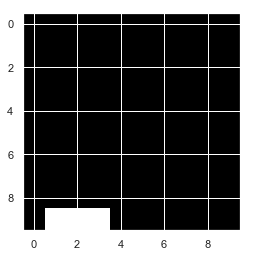

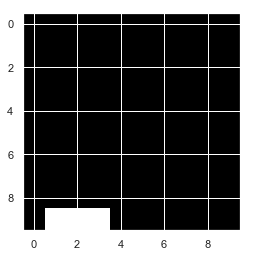

In [14]:
test(model)

## Avaliando o Progresso

Essa demo é bastante impressionante, hein? Antes de terminar esta pequena excursão, vamos ter um olhar mais atento sobre o modo como nosso modelo realmente aprendeu. Mais cedo, salvamos a história das vitórias. Agora, podemos traçar a média móvel da diferença, ou seja, quantas vitórias adicionais marcaram o modelo por jogo extra. 1 vitória extra por jogo significa que o modelo ganha cada jogo (pega todas as frutas), 0 significa que ela perde todas elas. Como você pode ver, o modelo se aproxima de uma taxa de vitória de 100% ao longo do tempo. Após 4000 peças, o modelo ganha de forma relativamente consistente. As quedas aleatórias no desempenho são provavelmente devido ao epsilon de escolha aleatória que são feitas de tempos em tempos. Um modelo melhor se aproximaria de 100% mais rápido.

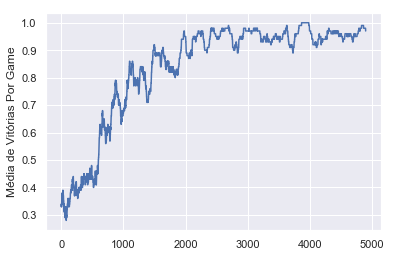

In [15]:
def moving_average_diff(a, n=100):
    diff = np.diff(a)
    ret = np.cumsum(diff, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

plt.plot(moving_average_diff(hist))
plt.ylabel('Média de Vitórias Por Game')
plt.show()

### Referências:

Desmystifying Deep Reinforcement Learning
https://www.intelnervana.com/demystifying-deep-reinforcement-learning/

Deep Reinforcement Learning Stanford
http://rll.berkeley.edu/deeprlcourse/

Deep Mind
https://deepmind.com/blog/deep-reinforcement-learning/
